In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
import yaml

with open('config.yml') as yml_file:
    config = yaml.safe_load(yml_file)

In [3]:
df = pd.read_json('tmdb_data.json')

In [4]:
df['poster_path']

0        /XWPDZzK7N2WQcejI8W96IxZEeP.jpg
1       /5zeVMAp3R4QHGarSc4Bf3B1uBY2.jpg
2       /2E2x8HYXAJpgWbJk4LSpJ8BT8Xl.jpg
3       /fx2gnyV2n9KdOCyGzQtVnpB9bIg.jpg
4       /3RWMETmYJm7BY19qnhU0Q4IGSOn.jpg
                      ...               
9257    /oztBLWdRk5gApYmNdADXvXkLT5m.jpg
9258    /kdkk7OBnIL1peW2zwcAAp6O54Jo.jpg
9259    /kEy48iCzGnp0ao1cZbNeWR6yIhC.jpg
9260    /h5NjOofdHeb6VX8U4xJHq8dfNOI.jpg
9261    /zxizwEPE8jhpbMgrFbwCztgvh2m.jpg
Name: poster_path, Length: 8332, dtype: object

In [5]:
def get_image(poster_path : str)->np.ndarray:
    url = config['base_url_for_poster']+poster_path
    return np.asarray(Image.open(requests.get(url, stream=True).raw))
    

In [6]:
from deepface import DeepFace
from deepface.detectors import FaceDetector

In [15]:
url = '/euSjkZqmCsONd8k5RMDLiGvxYhN.jpg'
image = get_image(url)

In [22]:
detector = FaceDetector.build_model(config['detector_backend']) #set opencv, ssd, dlib, mtcnn or retinaface
faces = FaceDetector.detect_faces(detector,config['detector_backend'],image)
outputs = []
for face in faces :
    output = DeepFace.analyze(face[0], enforce_detection=False, detector_backend = config['detector_backend'], actions=('gender', 'age'))
    one_face_analyse = [output['gender'], output['region']['h']*output['region']['w']/(image.shape[0]*image.shape[1])]
    outputs.append(one_face_analyse)


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]   


In [19]:
outputs

[['neutral', 'Woman', 'white', 0.012640569395017794],
 ['angry', 'Man', 'white', 0.012640569395017794],
 ['neutral', 'Man', 'asian', 0.010804270462633452]]

In [9]:
import matplotlib.pyplot as plt

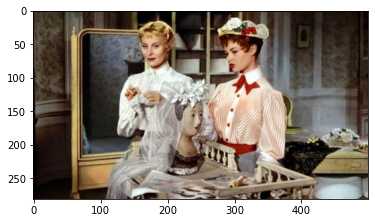

In [16]:
plt.imshow(image)

In [78]:
def clear_output(results):
    nb_women, nb_men, area_men, area_women = 0,0,0,0
    for result in results:
        if result[1]=='Woman': 
            nb_women+=1
            area_women+=result[-1]
        else : 
            nb_men+=1
            area_men+= result[-1]
    return  nb_women, nb_men, area_women, area_men
        
    

In [79]:
clear_output(outputs)

(5, 0, 0.06644533333333333, 0)